# Importing Libraries

In [1]:
# import librairies
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import time 
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14,14]

In [2]:
!pip install networkx 
!pip install bokeh 
!pip install holoviews
!conda install -y graphviz pygraphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
- 

In [3]:
!pip install chart_studio
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.0 MB/s eta 0:00:0000:0100:01


# Load the Data

In [4]:
# load the data
df = pd.read_csv('Sneaker Predictions/StockXSneakerData.csv')
# convert to datetime
df["releaseDate"] = pd.to_datetime(df['releaseDate'])
df['year'] = df['releaseDate'].dt.year
df['month'] = df['releaseDate'].dt.month
df['day'] = df['releaseDate'].dt.day

df.head()

,name,brand,category,colors,description,price,lastSale,releaseDate,url,year,month,day
0,Nike Dunk Low White/Black,Nike,sneakers,['White/Black'],From the school-spirited College Colors Progra...,$249.00,$286.00,2021-03-10,https://stockx.com/nike-dunk-low-retro-white-b...,2021,3,10
1,Nike Dunk High White/Game Royal-Total Orange,Nike,sneakers,['White/Game Royal-Total Orange'],The Nike Dunk High Game Royal pays homage to t...,$195.00,$188.00,2021-06-29,https://stockx.com/nike-dunk-high-game-royal,2021,6,29
2,Jordan 1 Retro AJKO Ghost Green/Ghost Green,Jordan,sneakers,['Ghost Green/Ghost Green'],Jordan teamed up with pop icon Billie Eilish t...,$276.00,$276.00,2021-09-30,https://stockx.com/air-jordan-1-retro-ajko-bil...,2021,9,30
3,Nike Dunk Low Yellow Strike/Yellow Strike-White,Nike,sneakers,['Yellow Strike/Yellow Strike-White'],The women's Nike Dunk Low Yellow Strike (W) fe...,$150.00,$149.00,2021-08-18,https://stockx.com/nike-dunk-low-yellow-strike-w,2021,8,18
4,Jordan 1 Retro AJKO Storm Blue/White-Black,Jordan,sneakers,['Storm Blue/White-Black'],"In a traditional AJKO canvas fabrication, the ...",$186.00,$186.00,2021-09-29,https://stockx.com/air-jordan-1-retro-ko-high-...,2021,9,29


In [6]:
print(df.shape)

(53, 12)


In [7]:
# Common Release dates
df.describe()

,year,month,day
count,53.000000,53.000000,53.000000
mean,2020.981132,7.962264,18.169811
std,0.137361,2.084395,8.941553
min,2020.000000,3.000000,3.000000
25%,2021.000000,7.000000,12.000000
50%,2021.000000,8.000000,18.000000
75%,2021.000000,9.000000,26.000000
max,2021.000000,12.000000,30.000000


In [8]:
# Checking for null values
nulls = pd.concat([df.isnull().sum()], axis=1)
nulls[nulls.sum(axis=1) > 0]

,0


In [9]:
# Remove $ and , from the price
df['price'] = df['price'].apply(lambda x: x.replace('$', ''))
df['price'] = df['price'].apply(lambda x: x.replace(',', ''))
df.head()

,name,brand,category,colors,description,price,lastSale,releaseDate,url,year,month,day
0,Nike Dunk Low White/Black,Nike,sneakers,['White/Black'],From the school-spirited College Colors Progra...,249.00,$286.00,2021-03-10,https://stockx.com/nike-dunk-low-retro-white-b...,2021,3,10
1,Nike Dunk High White/Game Royal-Total Orange,Nike,sneakers,['White/Game Royal-Total Orange'],The Nike Dunk High Game Royal pays homage to t...,195.00,$188.00,2021-06-29,https://stockx.com/nike-dunk-high-game-royal,2021,6,29
2,Jordan 1 Retro AJKO Ghost Green/Ghost Green,Jordan,sneakers,['Ghost Green/Ghost Green'],Jordan teamed up with pop icon Billie Eilish t...,276.00,$276.00,2021-09-30,https://stockx.com/air-jordan-1-retro-ajko-bil...,2021,9,30
3,Nike Dunk Low Yellow Strike/Yellow Strike-White,Nike,sneakers,['Yellow Strike/Yellow Strike-White'],The women's Nike Dunk Low Yellow Strike (W) fe...,150.00,$149.00,2021-08-18,https://stockx.com/nike-dunk-low-yellow-strike-w,2021,8,18
4,Jordan 1 Retro AJKO Storm Blue/White-Black,Jordan,sneakers,['Storm Blue/White-Black'],"In a traditional AJKO canvas fabrication, the ...",186.00,$186.00,2021-09-29,https://stockx.com/air-jordan-1-retro-ko-high-...,2021,9,29


In [10]:
# Remove $ from lastSale
df['lastSale'] = df['lastSale'].apply(lambda x: x.replace('$', ''))
df.head()

,name,brand,category,colors,description,price,lastSale,releaseDate,url,year,month,day
0,Nike Dunk Low White/Black,Nike,sneakers,['White/Black'],From the school-spirited College Colors Progra...,249.00,286.00,2021-03-10,https://stockx.com/nike-dunk-low-retro-white-b...,2021,3,10
1,Nike Dunk High White/Game Royal-Total Orange,Nike,sneakers,['White/Game Royal-Total Orange'],The Nike Dunk High Game Royal pays homage to t...,195.00,188.00,2021-06-29,https://stockx.com/nike-dunk-high-game-royal,2021,6,29
2,Jordan 1 Retro AJKO Ghost Green/Ghost Green,Jordan,sneakers,['Ghost Green/Ghost Green'],Jordan teamed up with pop icon Billie Eilish t...,276.00,276.00,2021-09-30,https://stockx.com/air-jordan-1-retro-ajko-bil...,2021,9,30
3,Nike Dunk Low Yellow Strike/Yellow Strike-White,Nike,sneakers,['Yellow Strike/Yellow Strike-White'],The women's Nike Dunk Low Yellow Strike (W) fe...,150.00,149.00,2021-08-18,https://stockx.com/nike-dunk-low-yellow-strike-w,2021,8,18
4,Jordan 1 Retro AJKO Storm Blue/White-Black,Jordan,sneakers,['Storm Blue/White-Black'],"In a traditional AJKO canvas fabrication, the ...",186.00,186.00,2021-09-29,https://stockx.com/air-jordan-1-retro-ko-high-...,2021,9,29


In [11]:
# what are the data types we're using
df.dtypes

name                   object
brand                  object
category               object
colors                 object
description            object
price                  object
lastSale               object
releaseDate    datetime64[ns]
url                    object
year                    int64
month                   int64
day                     int64
dtype: object

In [12]:
df

,name,brand,category,colors,description,price,lastSale,releaseDate,url,year,month,day
0,Nike Dunk Low White/Black,Nike,sneakers,['White/Black'],From the school-spirited College Colors Progra...,249.00,286.00,2021-03-10,https://stockx.com/nike-dunk-low-retro-white-b...,2021,3,10
1,Nike Dunk High White/Game Royal-Total Orange,Nike,sneakers,['White/Game Royal-Total Orange'],The Nike Dunk High Game Royal pays homage to t...,195.00,188.00,2021-06-29,https://stockx.com/nike-dunk-high-game-royal,2021,6,29
2,Jordan 1 Retro AJKO Ghost Green/Ghost Green,Jordan,sneakers,['Ghost Green/Ghost Green'],Jordan teamed up with pop icon Billie Eilish t...,276.00,276.00,2021-09-30,https://stockx.com/air-jordan-1-retro-ajko-bil...,2021,9,30
3,Nike Dunk Low Yellow Strike/Yellow Strike-White,Nike,sneakers,['Yellow Strike/Yellow Strike-White'],The women's Nike Dunk Low Yellow Strike (W) fe...,150.00,149.00,2021-08-18,https://stockx.com/nike-dunk-low-yellow-strike-w,2021,8,18
4,Jordan 1 Retro AJKO Storm Blue/White-Black,Jordan,sneakers,['Storm Blue/White-Black'],"In a traditional AJKO canvas fabrication, the ...",186.00,186.00,2021-09-29,https://stockx.com/air-jordan-1-retro-ko-high-...,2021,9,29
5,Nike Dunk Low White/Green Glow-White,Nike,sneakers,['White/Green Glow-White'],After releasing the Nike Dunk Low Orange Pearl...,198.00,348.00,2021-04-16,https://stockx.com/nike-dunk-low-green-glow-w,2021,4,16
6,adidas Yeezy Boost 700 Wash Orange/Wash Orange...,adidas,sneakers,['Wash Orange/Wash Orange/Wash Orange'],The adidas Yeezy Boost 700 Wash Orange feature...,254.00,254.00,2021-10-16,https://stockx.com/adidas-yeezy-boost-700-wash...,2021,10,16
7,Jordan 12 Retro White/Black-University Red,Jordan,sneakers,['White/Black-University Red'],The Air Jordan 12 Twist features a white tumbl...,297.00,297.00,2021-07-24,https://stockx.com/air-jordan-12-retro-twist,2021,7,24
8,Nike LD Waffle SF Blue Void/White-Obsidian-White,Nike,sneakers,['Blue Void/White-Obsidian-White'],The Nike LDWaffle sacai Fragment Blue Void com...,272.00,306.00,2021-08-27,https://stockx.com/nike-ld-waffle-sf-sacai-fra...,2021,8,27
9,Jordan 1 Retro High OG Seafoam/Healing Orange-...,Jordan,sneakers,['Seafoam/Healing Orange-White'],The women's Air Jordan 1 High Seafoam (W) arri...,249.00,249.00,2021-08-12,https://stockx.com/air-jordan-1-high-og-seafoam-w,2021,8,12


Checking dispersion of results by cluster, day, month, and year

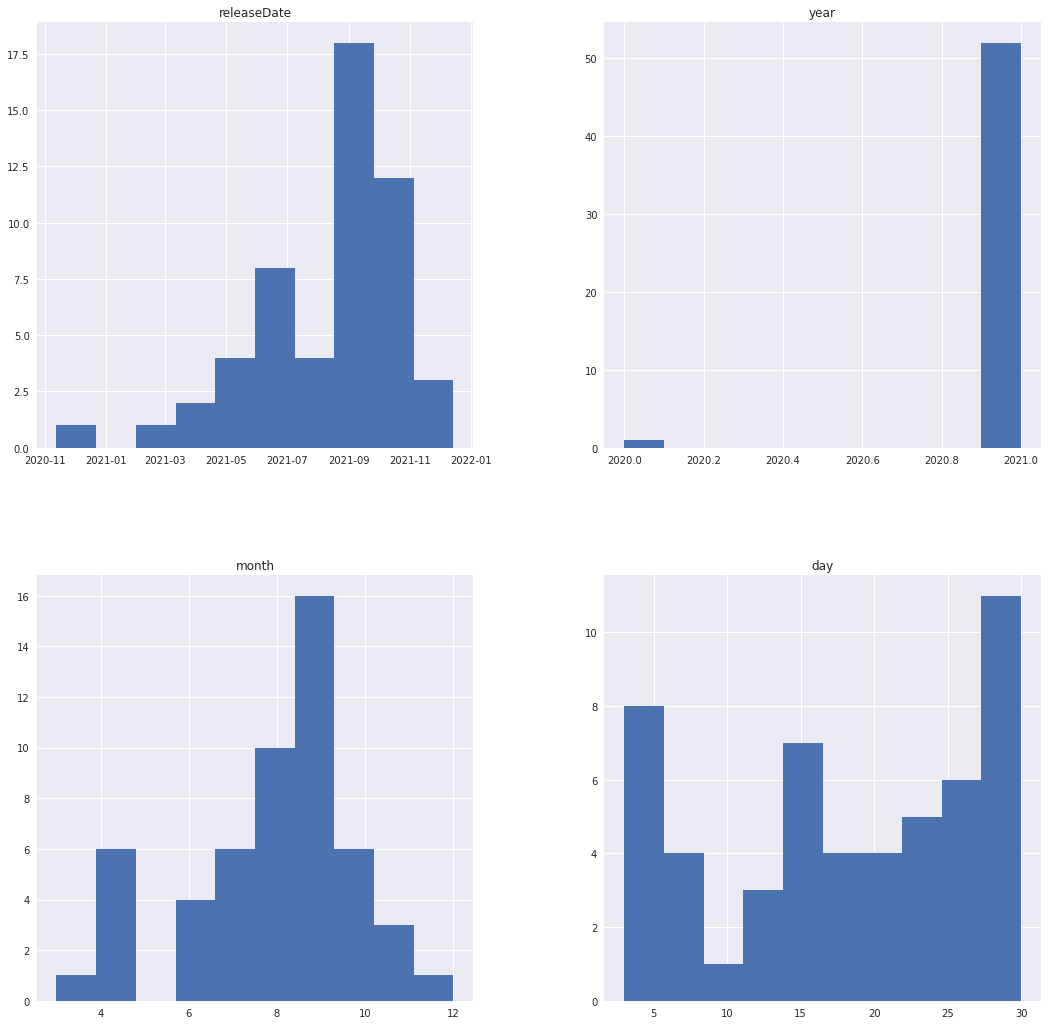

In [13]:
df.hist(figsize=(18,18))
plt.show()

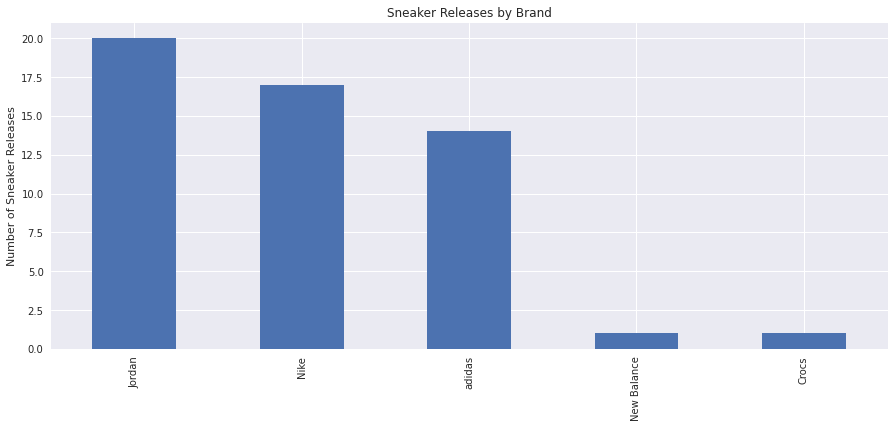

In [14]:
plt.figure(figsize=(15,6))
df.brand.value_counts().plot.bar()
plt.title("Sneaker Releases by Brand")
plt.ylabel("Number of Sneaker Releases")
plt.show()

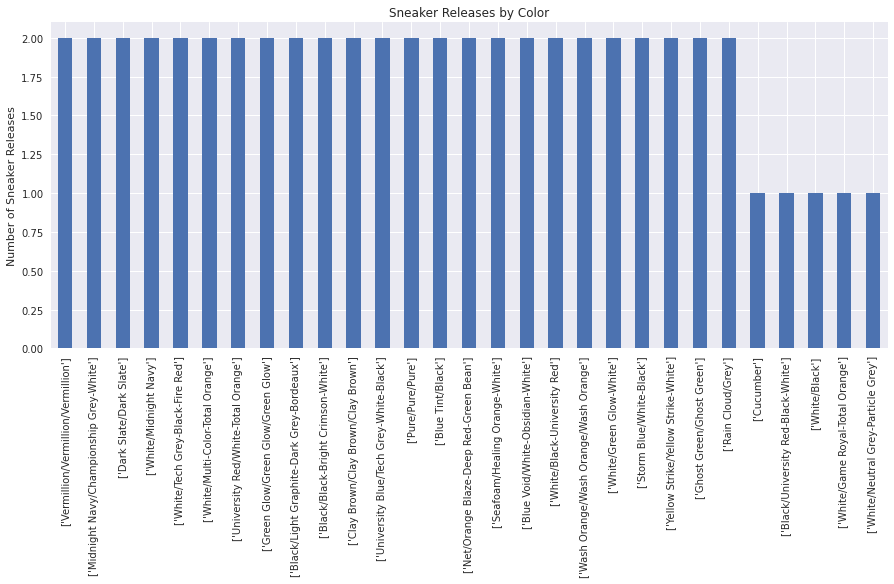

In [15]:
plt.figure(figsize=(15,6))
df.colors.value_counts().plot.bar()
plt.title("Sneaker Releases by Color")
plt.ylabel("Number of Sneaker Releases")
plt.show()

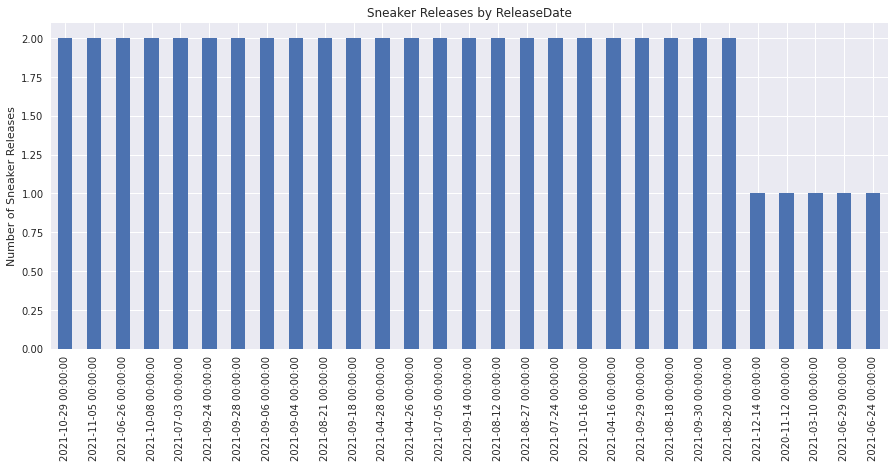

In [16]:
plt.figure(figsize=(15,6))
df.releaseDate.value_counts().plot.bar()
plt.title("Sneaker Releases by ReleaseDate")
plt.ylabel("Number of Sneaker Releases")
plt.show()

In [17]:
#Now let's add a string value instead to make our Series clean:
word_string=" ".join(df['description'].str.lower())

In [18]:
import wordcloud #will use for the word cloud plot
from wordcloud import WordCloud, STOPWORDS # optional to filter out the stopwords

Most commonly used words in the description

(-0.5, 1599.5, 799.5, -0.5)

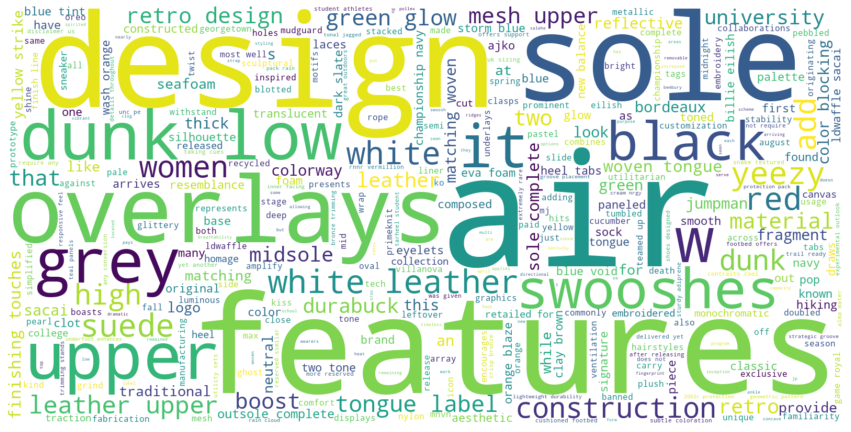

In [23]:
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="white", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

Removing the brands and stop words to retrieve a better understanding of what real words are populating in the descriptions.

(-0.5, 1599.5, 799.5, -0.5)

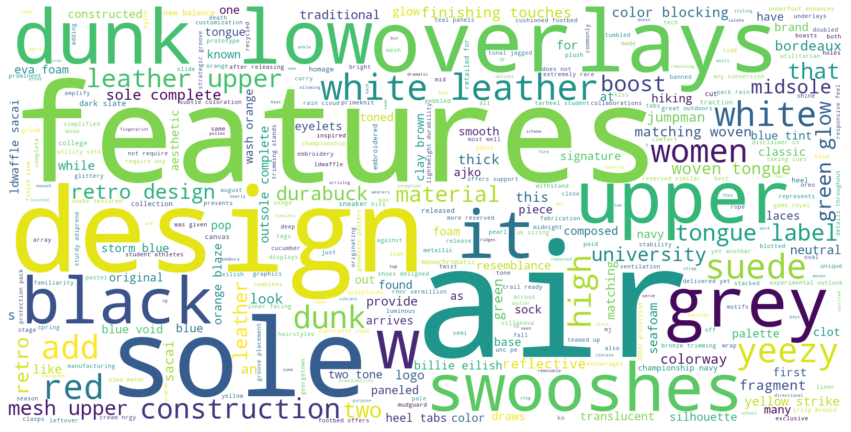

In [24]:
plt.figure(figsize=(15,15))
STOPWORDS = ['adidas', 'jordan', 'nike', 'new balance', 'crocs', 'and', 'of', 'the', 'with', 'in', 'from', 'there', 'on', 'is', 'to', 'a' ]
wc = WordCloud(background_color="white", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

# KMeans clustering with TF-IDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import KMeans

# Build the tfidf matrix with the descriptions

start_time = time.time()
text_content = df['description']
vector = TfidfVectorizer(max_df=0.4,         
                             min_df=1,      
                             stop_words='english', 
                             lowercase=True,  
                             use_idf=True,   
                             norm=u'l2',     
                             smooth_idf=True 
                            )
tfidf = vector.fit_transform(text_content)

# Clustering  Kmeans
k = 5
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names()

    
request_transform = vector.transform(df['description'])

df['cluster'] = kmeans.predict(request_transform) 

df['cluster'].value_counts().head()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


1    17
3    14
2    12
0     6
4     4
Name: cluster, dtype: int64

Load the graph (undirected graph)
Nodes are :

Sneakers
Price
Brand
Colors
Cluster (description)
Sim(title) top 5 similar sneakers in the sense of the description
Edges are :

PRICE_IN : relation between a price and a sneaker name
BRAND_IN : relation between a brand and a sneaker name
COLOR_REL : relation between colors and a sneaker name
DESCRIPTION : relation between a cluster and a sneaker name
SIMILARITY in the case of the description

In [30]:
%matplotlib inline

import pandas as pd
import networkx as nx

In [31]:
descriptions = list(df.description.unique())
names = list(df.name.unique())

['New Balance 2002R Rain Cloud/Grey']


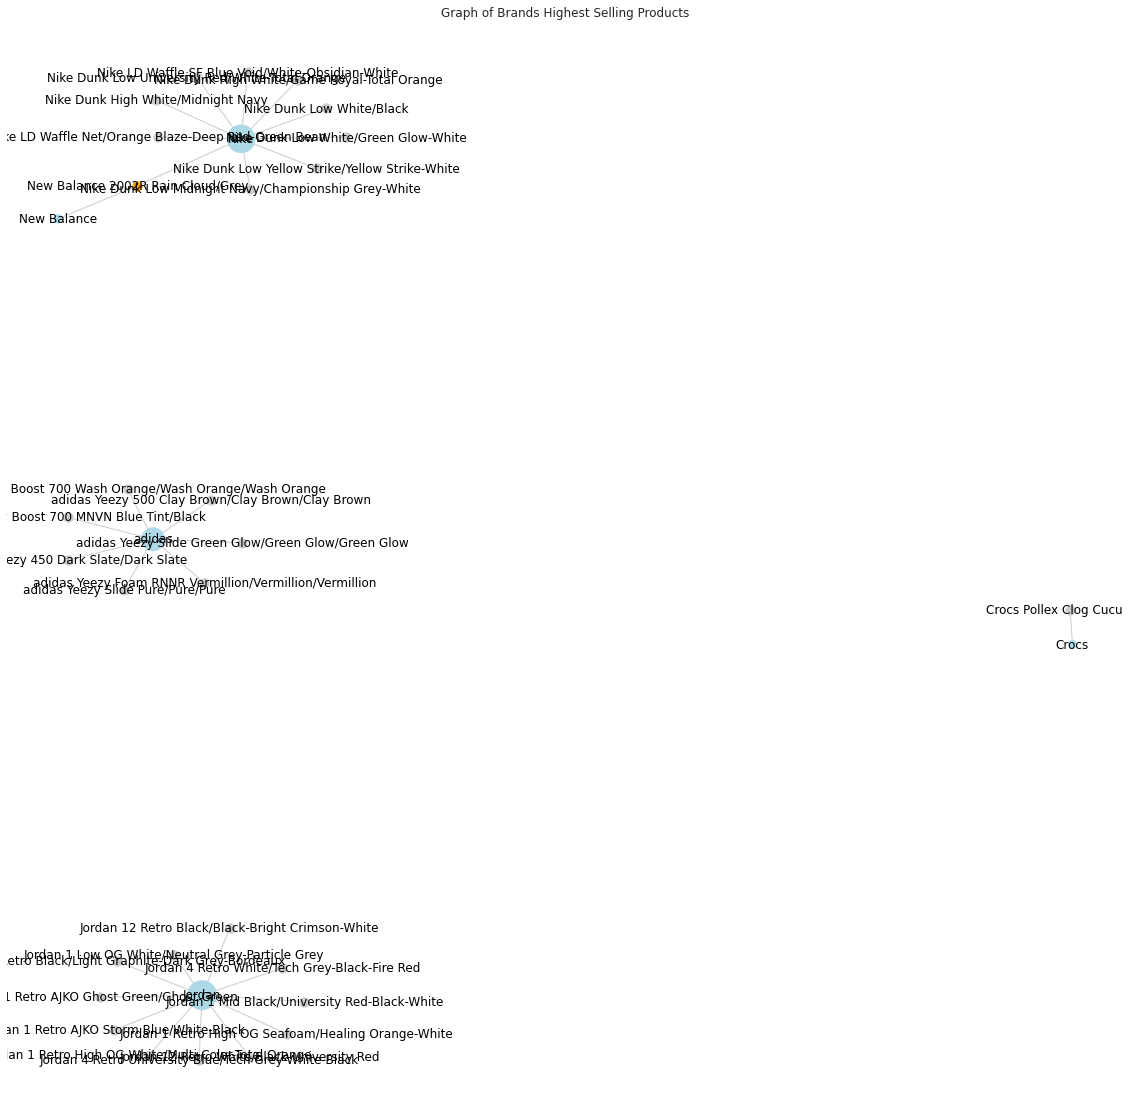

In [32]:
brands = list(df.brand.unique())
plt.figure(figsize=(20, 20))

# 1. Create the graph
g = nx.from_pandas_edgelist(df, source='name', target='brand') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)


brand_size = [g.degree(brand) * 80 for brand in brands]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=brands, 
                       node_size=brand_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

nx.draw_networkx_nodes(g, layout, nodelist=names, node_color='#cccccc', node_size=100)
node_labels = dict(zip(names, names))
nx.draw_networkx_labels(g, layout, labels=node_labels)

# Draw POPULAR sneakers
popular_name = [name for name in names if g.degree(name) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_name, node_color='orange', node_size=100)
print(popular_name)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(brands, brands))
nx.draw_networkx_labels(g, layout, labels=node_labels)

plt.axis('off')

plt.title("Graph of Brands Highest Selling Products")

plt.show()

[]


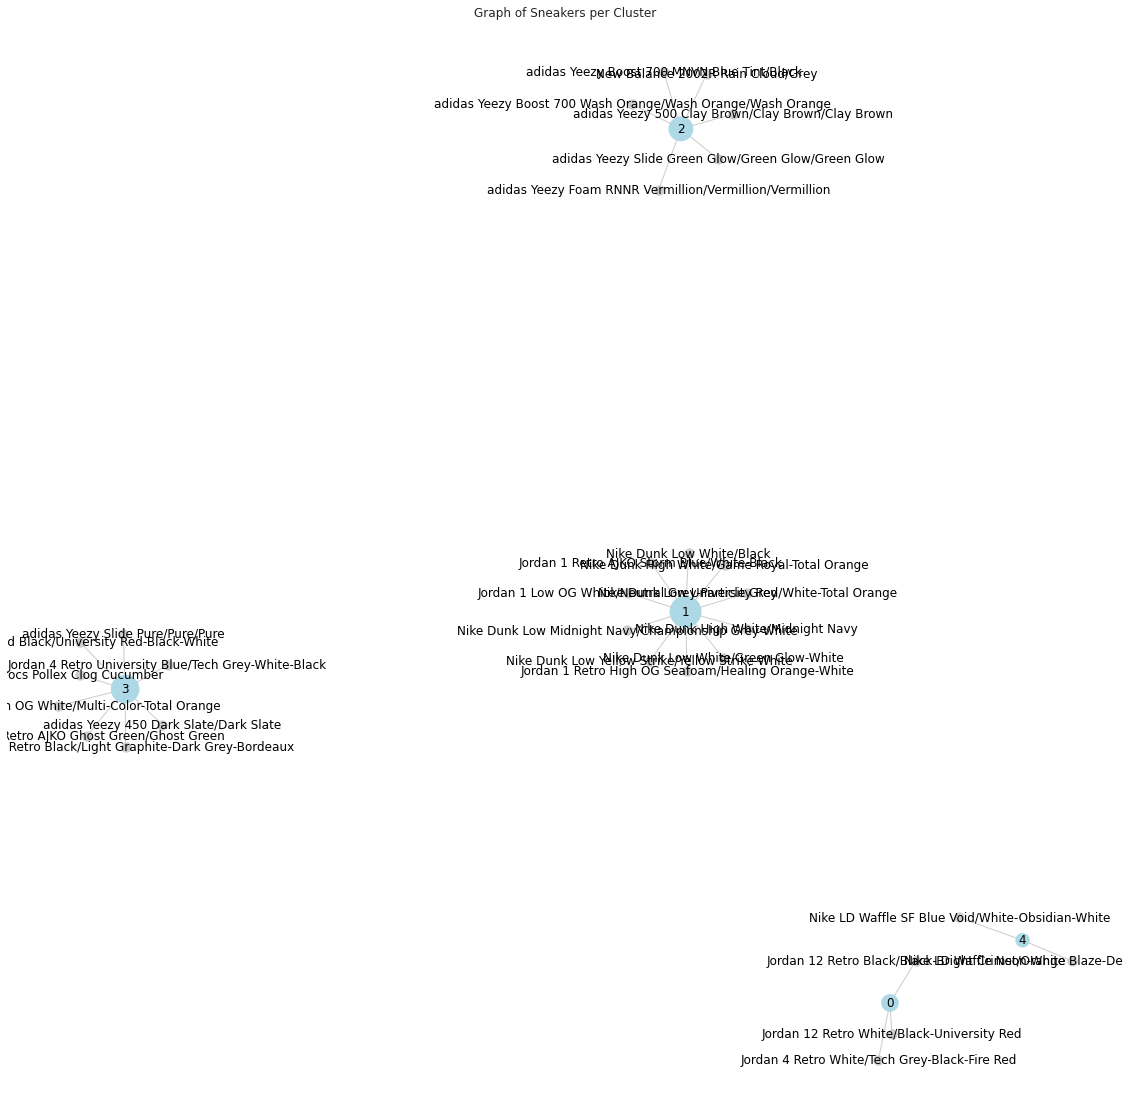

In [33]:
clusters = list(df.cluster.unique())
plt.figure(figsize=(20, 20))

# 1. Create the graph
g = nx.from_pandas_edgelist(df, source='name', target='cluster') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

cluster_size = [g.degree(cluster) * 100 for cluster in clusters]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=clusters, 
                       node_size=cluster_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')


nx.draw_networkx_nodes(g, layout, nodelist=names, node_color='#cccccc', node_size=100)
node_labels = dict(zip(names, names))
nx.draw_networkx_labels(g, layout, labels=node_labels)

# Draw POPULAR sneakers
popular_name = [name for name in names if g.degree(name) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_name, node_color='orange', node_size=100)
print(popular_name)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(clusters, clusters))
nx.draw_networkx_labels(g, layout, labels=node_labels)

plt.axis('off')

plt.title("Graph of Sneakers per Cluster")

plt.show()

In [34]:
G = nx.Graph()
start_time = time.time()
for i, rowi in df.iterrows():
    if (i%1000==0):
        print(" iter {} -- {} seconds --".format(i,time.time() - start_time))
    G.add_node(rowi['name'],key=rowi['url'],label="SNEAKERS",mtype=rowi['category'])

    for element in rowi['price']:
        G.add_node(element,label="PRICE")
        G.add_edge(rowi['name'], element, label="PRICE_REL")
    for element in rowi['brand']:
        G.add_node(element,label="BRAND")
        G.add_edge(rowi['name'], element, label="BRAND_REL")
    for element in rowi['colors']:
        G.add_node(element,label="COLOR")
        G.add_edge(rowi['name'], element, label="COLOR_REL")
    
    
    indices = find_similar(tfidf, i, top_n = 5)
    snode="Sim("+rowi['name']+")"        
    G.add_node(snode,label="SIMILAR")
    G.add_edge(rowi['name'], snode, label="SIMILARITY")
    for element in indices:
        G.add_edge(snode, df['name'].loc[element], label="SIMILARITY")
print(" finish -- {} seconds --".format(time.time() - start_time)) 

 iter 0 -- 0.001346588134765625 seconds --
 finish -- 0.060073137283325195 seconds --


Functions for generating a sub graph of all adjacent nodes placed into a list with a function to draw the subgraph

In [35]:
def get_all_adj_nodes(list_in):
    sub_graph=set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):        
                sub_graph.add(e)
    return list(sub_graph)
def draw_sub_graph(sub_graph):
    plt.figure(figsize=(20, 10))
    plt.title("Top Related Shoes to the Nike Dunk")
    subgraph = G.subgraph(sub_graph)
    colors=[]
    for e in subgraph.nodes():
        if G.nodes[e]['label']=="SNEAKERS":
            colors.append('blue')
        elif G.nodes[e]['label']=="PRICE":
            colors.append('red')
        elif G.nodes[e]['label']=="BRAND":
            colors.append('green')
        elif G.nodes[e]['label']=="COLOR":
            colors.append('yellow')    
        elif G.nodes[e]['label']=="SIMILAR":
            colors.append('orange')    
        elif G.nodes[e]['label']=="CLUSTER":
            colors.append('orange')

    nx.draw_networkx(subgraph, with_labels=True, font_weight='bold',node_color=colors, title = "Top Related Shoes to the Nike Dunk")
    
    
    plt.show()

# Note the nodes other than the name and similar are printing the first character (element) of the data within the cell of the column.

In [37]:
# Find similar : get the top_n sneakers with description similar to the target description 
def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n] 

Recommendation Function for recommending Similar Sneakers to one you've selected

In [38]:
def get_recommendation(root):
    commons_dict = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2==root:
                continue
            if G.nodes[e2]['label']=="SNEAKERS":
                commons = commons_dict.get(e2)
                if commons==None:
                    commons_dict.update({e2 : [e]})
                else:
                    commons.append(e)
                    commons_dict.update({e2 : commons})
    sneakers=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for e in values:
            w=w+1/math.log(G.degree(e))
        sneakers.append(key) 
        weight.append(w)
    
    result = pd.Series(data=np.array(weight),index=sneakers)
    result.sort_values(inplace=True,ascending=False)        
    return result;

In [39]:
result = get_recommendation("Nike Dunk Low White/Black")
result2 = get_recommendation("Nike Dunk High White/Game Royal-Total Orange")
result3 = get_recommendation("adidas Yeezy Foam RNNR Vermillion/Vermillion/Vermillion")
result4 = get_recommendation("Jordan 1 Retro High OG Seafoam/Healing Orange-White")
print("*"*40+"\n Recommendation for 'Nike Dunk Low White/Black'\n"+"*"*40)
print(result.head())
print("*"*40+"\n Recommendation for 'Nike Dunk High White/Game Royal-Total Orange'\n"+"*"*40)
print(result2.head())
print("*"*40+"\n Recommendation for 'adidas Yeezy Foam RNNR Vermillion/Vermillion/Vermillion'\n"+"*"*40)
print(result3.head())
print("*"*40+"\n Recommendation for 'Jordan 1 Retro High OG Seafoam/Healing Orange-White'\n"+"*"*40)
print(result4.head())

****************************************
 Recommendation for 'Nike Dunk Low White/Black'
****************************************
Jordan 12 Retro White/Black-University Red          7.034744
Nike Dunk Low White/Green Glow-White                6.557703
Jordan 12 Retro Black/Black-Bright Crimson-White    6.520846
Nike Dunk High White/Midnight Navy                  6.384759
Nike Dunk High White/Game Royal-Total Orange        6.306520
dtype: float64
****************************************
 Recommendation for 'Nike Dunk High White/Game Royal-Total Orange'
****************************************
Nike Dunk Low University Red/White-Total Orange        10.599071
Nike Dunk Low Midnight Navy/Championship Grey-White     8.903818
Nike Dunk Low White/Green Glow-White                    8.773577
Nike Dunk High White/Midnight Navy                      8.401578
Jordan 4 Retro White/Tech Grey-Black-Fire Red           8.181318
dtype: float64
****************************************
 Recommendation for 